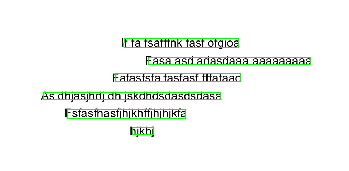

True

In [1]:
from common import *


# cv2.startWindowThread()

# cv2.imshow('org', img)
# Transfer to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imwrite(f'image_process/gray/gray_of_{name}',gray)
# cv2.imshow('gray', gray)

# Use Sobel edge detection to generate binary images
sobel = cv2.Sobel(gray, cv2.CV_8U, 1, 0, ksize=3)
cv2.imwrite(f'image_process/sobel/sobel_of_{name}',sobel)
# Binarize this
ret, binary = cv2.threshold(sobel, 0, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY)
cv2.imwrite(f'image_process/binary/binary_of_{name}',binary)
# cv2.imshow('binary', binary)
# Expansion, corrosion
res1 = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 9))
res2 = cv2.getStructuringElement(cv2.MORPH_RECT, (24, 6))

# Expand once to make the outline stand out
dilation = cv2.dilate(binary, res2, iterations=1)
# cv2.imshow('dilation', dilation)
# Corrosion once, remove details
erosion = cv2.erode(dilation, res1, iterations=1)
# cv2.imshow('erosion', erosion)
cv2.imwrite(f'image_process/mor_process_of_{name}',erosion)


# Find outline and filter text area
region = []
contours, hierarchy = cv2.findContours(erosion, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contours)):
    cnt = contours[i]

    # Calculate the contour area and filter out the small area
    area = cv2.contourArea(cnt)
    if (area < 700):
        continue

    # Find the smallest area
    rect = cv2.minAreaRect(cnt)

    # box is the coordinates of the four points
    box = cv2.boxPoints(rect)
    box = np.int0(box)

    # Calculate height and width
    height = abs(box[0][1] - box[2][1])
    width = abs(box[0][0] - box[2][0])
    
    # Filter out those rectangles that are too thin, leaving flat ones
    if (height > width * 1.3):
        continue

    region.append(box)

# Draw the outline of the text box
for box in region:
    cv2.drawContours(img, [box], 0, (0, 255, 0), 2)

    
show(img)
cv2.imwrite(f'results/mor_result_of_{name}',img)

In [2]:
# print(region[-1],type(region[-1]))
# print(region[-2],type(region[-2]))
# print(region[-3],type(region[-3]))
# print(region[-4],type(region[-4]))
# print(region[-5],type(region[-5]))

In [3]:
rect_dict={}

for i in range(len(region)):
    rect_dict[f'r{i+1}'] = Rect(region[-i-1],f'line{i+1}')
# for i in rect_dict.values():
#     print(i.start)

rect_list = []
for i in range(len(rect_dict)):
    rect_list.append(rect_dict[f'r{i+1}'])


In [4]:
# when only condsider two neighbor lines
# Print ralationships description by language and relationships 1-dim array
oneDim_array = []
for i in range(len(rect_list)-1):
    num,res = Rect.relationship(rect_list[i],rect_list[i+1])
    oneDim_array.append(num)
    print(res)
print(oneDim_array)

2.1)line1 overlaps the start of line2
3.1)line2 overlaps the end of line3
3.1)line3 overlaps the end of line4
2.4)line4 covers line5
2.4)line5 covers line6
[4, 9, 9, 7, 7]


In [5]:
# when condsider ralations of each two lines
# Print ralationships description by language
twoDim_list = []
for i in range(len(rect_list)):
    array = []
    for j in range(len(rect_list)):  
#         if j != i:
        num,res = Rect.relationship(rect_list[i],rect_list[j])
        array.append(num)
        print(res)
    twoDim_list.append(array)

****line1 is not above the line1
2.1)line1 overlaps the start of line2
3.3)line1 ends with but starts after line3
3.1)line1 overlaps the end of line4
3.1)line1 overlaps the end of line5
2.4)line1 covers line6
****line2 is not above the line1
****line2 is not above the line2
3.1)line2 overlaps the end of line3
3.1)line2 overlaps the end of line4
3.1)line2 overlaps the end of line5
3.1)line2 overlaps the end of line6
****line3 is not above the line1
****line3 is not above the line2
****line3 is not above the line3
3.1)line3 overlaps the end of line4
3.1)line3 overlaps the end of line5
2.4)line3 covers line6
****line4 is not above the line1
****line4 is not above the line2
****line4 is not above the line3
****line4 is not above the line4
2.4)line4 covers line5
2.4)line4 covers line6
****line5 is not above the line1
****line5 is not above the line2
****line5 is not above the line3
****line5 is not above the line4
****line5 is not above the line5
2.4)line5 covers line6
****line6 is not abov

In [6]:
# Print relationships 2-dim array
twoDim_array = np.array(twoDim_list)
print(twoDim_array)
print(twoDim_array.shape)

[[ 0  4 11  9  9  7]
 [ 0  0  9  9  9  9]
 [ 0  0  0  9  9  7]
 [ 0  0  0  0  7  7]
 [ 0  0  0  0  0  7]
 [ 0  0  0  0  0  0]]
(6, 6)
